# Problem

One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)

# Data

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import svm

import warnings
warnings.simplefilter('ignore')

In [3]:
bank_loans = pd.read_csv('bankloans.csv')
bank_loans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
bank_loans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

**Data Description:**

age - Age of Customer
ed - Eductation level of customer
employ: Tenure with current employer (in years)
address: Number of years in same address
income: Customer Income
debtinc: Debt to income ratio
creddebt: Credit to Debt ratio
othdebt: Other debts
default: Customer defaulted in the past (1= defaulted, 0=Never defaulted) - target variable

In [6]:
bank_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [7]:
bank_loans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

We can clearly see that our target varible has some missing values which could be interpreted as these slots belongs to new customers thus we wish to build models for only existing customers.

In [8]:
##Checking for the correlaation between the variables
bank_loans.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.137657
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.114676
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.282978
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.164451
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.070970
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.389575
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.244740
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


In [86]:
##Description of our data
bank_loans.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [9]:
## Dividing the data into existing customer and new customers
existing_customers = bank_loans[bank_loans.default.isnull()==False]
new_customers = bank_loans[bank_loans.default.isnull()== True]

In [11]:
existing_customers.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [12]:
new_customers.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


# Exploratory Data Analysis

In [13]:
#We decide to make education a categorical variable as well as the dependent variable 

In [14]:
education= {1: 'Graduate School',2: 'College',3: 'High School',4: 'Middle School,',5: 'Others'}
default = {0: 'Never_default', 1:'Default'}

In [35]:
existing_customers['ed'] = existing_customers.ed.map(education)
existing_customers['default'] = existing_customers.default.map(default)

In [36]:
existing_customers.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,High School,17,12,176,9.3,11.359392,5.008608,Default
1,27,Graduate School,10,6,31,17.3,1.362202,4.000798,Never_default
2,40,Graduate School,15,14,55,5.5,0.856075,2.168925,Never_default
3,41,Graduate School,15,14,120,2.9,2.658720,0.821280,Never_default
4,24,College,2,0,28,17.3,1.787436,3.056564,Default


Text(0.5, 1.0, 'Frequency of the defaults')

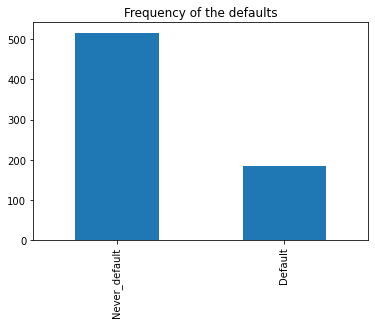

In [37]:
##Distribution of the target variable
existing_customers.default.value_counts().plot(kind='bar')
plt.title('Frequency of the defaults')

In [131]:
## From the above, we can see that we have more people who have never defaulted than defaulters for existing customers.

In [38]:
cat_var = existing_customers.select_dtypes(include='object')
num_var = existing_customers.select_dtypes(include='number')

In [39]:
num_var

,age,employ,address,income,debtinc,creddebt,othdebt
0,41,17,12,176,9.3,11.359392,5.008608
1,27,10,6,31,17.3,1.362202,4.000798
2,40,15,14,55,5.5,0.856075,2.168925
3,41,15,14,120,2.9,2.658720,0.821280
4,24,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...
695,36,6,15,27,4.6,0.262062,0.979938
696,29,6,4,21,11.5,0.369495,2.045505
697,33,15,3,32,7.6,0.491264,1.940736
698,45,19,22,77,8.4,2.302608,4.165392


In [40]:
categories = existing_customers['ed']

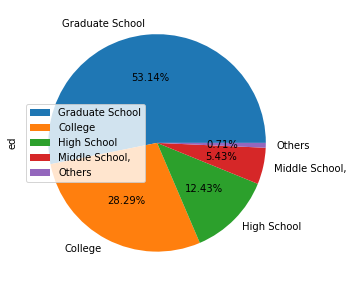

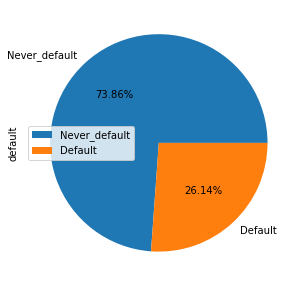

In [44]:
##Visualizing the categorical variables
for i in cat_var.columns:
    plt.figure(figsize=(10,5))
    cat_var[i].value_counts().plot(kind= 'pie',autopct ='%1.2f%%')
    plt.legend(loc =6)
    plt.show()   

We can see that our data consist of more people with Graduate education than the other education level.


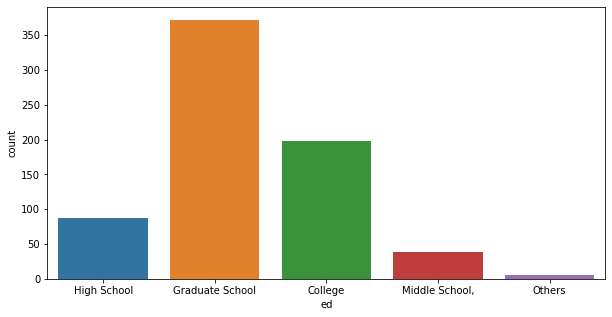

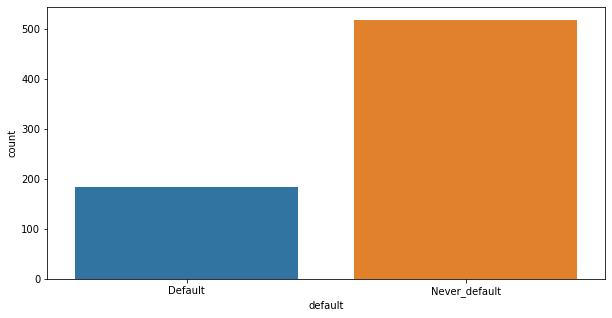

In [46]:
for i in cat_var.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data= existing_customers)

In [47]:
## levels of education grouped into default and never default
pd.crosstab(existing_customers.ed,existing_customers.default)

default,Default,Never_default
ed,,
College,59,139
Graduate School,79,293
High School,30,57
"Middle School,",14,24
Others,1,4


Text(0.5, 1.0, 'Default types at various educational level')

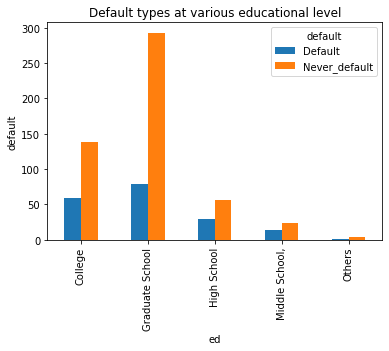

In [48]:
## relationship between education and defaults
pd.crosstab(existing_customers.ed,existing_customers.default).plot(kind='bar')
plt.ylabel('default')
plt.title('Default types at various educational level')

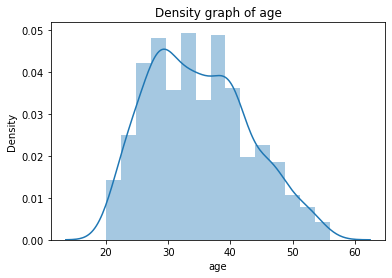

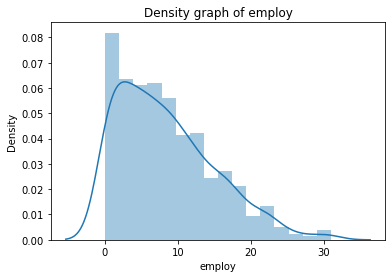

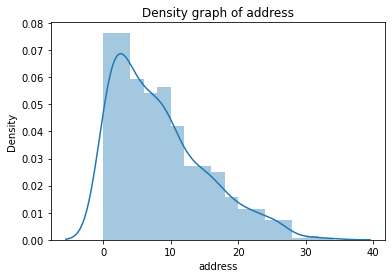

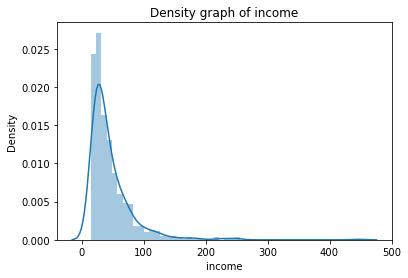

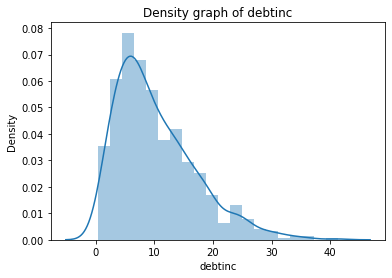

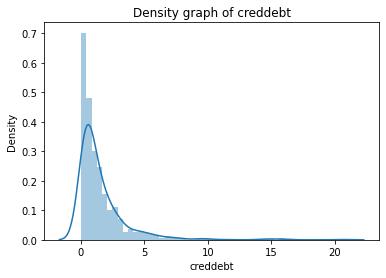

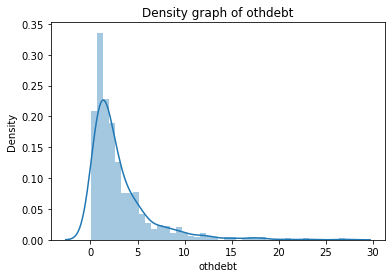

In [49]:
##distribution of the numerical vaules 
for i in num_var.columns:
    plt.figure()
    sns.distplot(num_var[i])
    plt.title(f'Density graph of {i}')

In [79]:
## from the age graph, we can see that our data is largely dominated by people between the age group  
## for years of employment, we can see that the data is skewed with 0 to 3 years being the highest tenure with current employer
## same right skewed for address, income,debt to income ratio, credit to income ratio and other debts

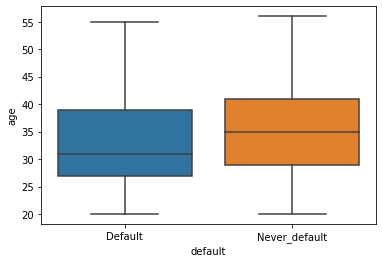

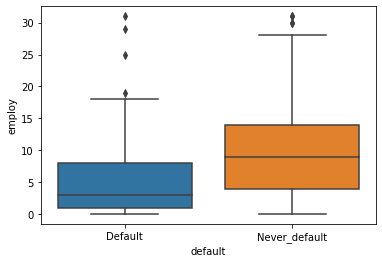

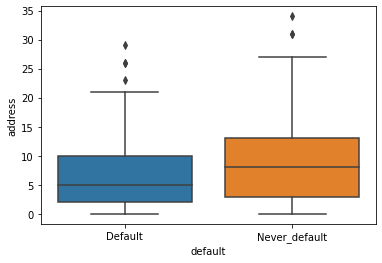

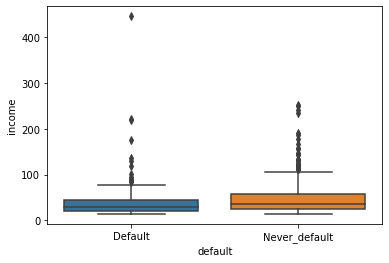

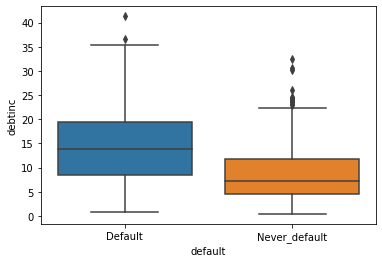

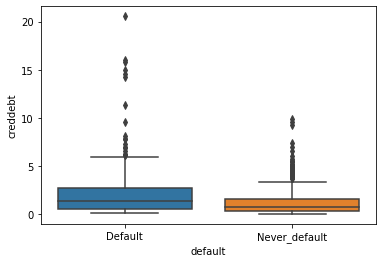

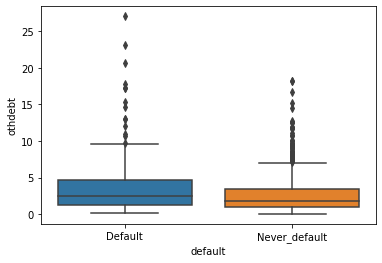

In [50]:
## Understanding the relationship between the numerical variables and the dependent variable
for i in num_var:
    plt.figure()
    sns.boxplot(x='default', y=i, data=existing_customers)

##Information from the figures above,
1. for age, it can be clearly seen the defaulters are people in the lower age groups.
2. for employ, people with lower tenure with current employer that is people who recently got employed tends to default more.
3. for address, people who have lived or are living at the same location for a short time tends to default more.
4. for income, the graph shows that low income earners tends to default more.
5. for debtinc, people with a higher percentage of their incomes financing debts tends to default more which logically makes sense.
6. for creddebt, a higher creddebt means the person will default.
7. for otherdebt, people with other debts higher tends to default.

# Model

### Random Forest

In [ ]:
## From the frequency of our data on default, we realised there a class imbalance ie. we have more non defaults than the defaults, we first try using the random forest algorithm.

In [74]:
existing_customers1 = bank_loans[bank_loans.default.isnull()==False]

In [76]:
X = existing_customers1.drop(['age','ed','default'], axis=1)

In [56]:
y = existing_customers1.default

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=0,test_size = 0.20)

In [113]:
rforest_model = RandomForestClassifier(n_estimators=80,criterion='entropy',
                                       random_state= 10, bootstrap=['True','False'] )

In [114]:
rforest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=['True', 'False'], criterion='entropy',
                       n_estimators=80, random_state=10)

In [115]:
y_pred =rforest_model.predict(X_test)

In [116]:
forest_sc = cross_val_predict(rforest_model, X_test, y_test, cv=10)

In [117]:
## Evaluating model based on the various metrics
print(metrics.classification_report(y_test, forest_sc))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       101
         1.0       0.48      0.26      0.33        39

    accuracy                           0.71       140
   macro avg       0.62      0.57      0.58       140
weighted avg       0.68      0.71      0.68       140



<AxesSubplot:>

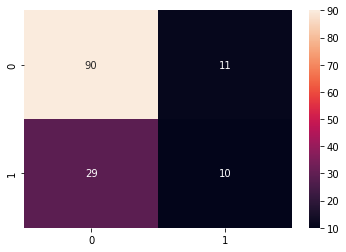

In [126]:
sns.heatmap(metrics.confusion_matrix(y_test,forest_sc), annot=True)

From the confusion matrix, we can see that there are 101 people and te model truly classified 90 people as non defaulter and wrongly classified 11 people as defaulters.

Also, out of the 39 people, the model correctly classified 10 as defaulter and wrongly classified 29 people as non defaulters.

### Support Vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=0,test_size = 0.20)

In [119]:
# Creating an SVM classifier with a linear kernel
exi_clf = svm.SVC(kernel='linear')

##training the model
exi_clf.fit(X_train,y_train)

##predicting the respone dataset
y_pred = exi_clf.predict(X_test)

In [122]:
exi_sc = cross_val_predict(exi_clf, X_test, y_test, cv=10)

In [123]:
print(metrics.classification_report(y_test, exi_sc))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       101
         1.0       0.54      0.36      0.43        39

    accuracy                           0.74       140
   macro avg       0.66      0.62      0.63       140
weighted avg       0.71      0.74      0.72       140



<AxesSubplot:>

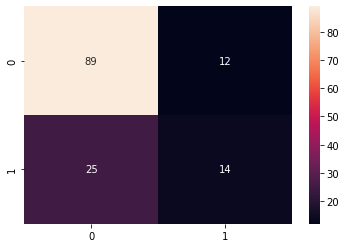

In [124]:
sns.heatmap(metrics.confusion_matrix(y_test,exi_sc), annot=True)

From the confusion matrix, we can see that there are 101 people and te model truly classified 89 people as non defaulter and wrongly classified 12 people as defaulters.

Also, out of the 39 people, the model correctly classified 14 as defaulter and wrongly classified 25 people as non defaulters.

**From the two techniques, we can see that the Random forest is a good model for our analysis as compared to the Support Vector Machine. Thus its preferred for this analysis.**
